In [1]:
import pandas as pd
import numpy as np
from Util import Unit, Facility, generate_units, calculate_bounds, extend_bounds
from PlotSolution import plot
from Solvers import BruteForceObnPMed, VNSObnPMed, SAObnPMed, TSObnPMed, APFObnPMed, APFObnPMedWithConstraint
import time

In [2]:
nuclear_plants_csv = pd.read_csv('centrales-de-production-nucleaire-edf.csv', sep = ';')
nuclear_plants_csv.drop_duplicates(subset=['GPS position (wsg84)'], keep='first', inplace = True)
nuclear_plants = generate_units(nuclear_plants_csv['Unit'].to_string(), nuclear_plants_csv['GPS position (wsg84)'].to_string())
print(nuclear_plants[5])

cities_csv = pd.read_csv('fr.csv')
cities_csv.drop_duplicates(subset=['lat', 'lng'], keep='first', inplace = True)
cities = generate_units(cities_csv['city'].to_string(), cities_csv['lat'].to_string(), cities_csv['lng'].to_string())
print(cities[5])

CHOOZ B 1 50.090344 4.789588
Nice 43.7034 7.2663


In [18]:
cities_csv.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Paris,48.8567,2.3522,France,FR,Île-de-France,primary,11060000,2148271
1,Bordeaux,44.8400,-0.5800,France,FR,Nouvelle-Aquitaine,admin,994920,994920
2,Marseille,43.2964,5.3700,France,FR,Provence-Alpes-Côte d’Azur,admin,873076,873076
3,Lyon,45.7600,4.8400,France,FR,Auvergne-Rhône-Alpes,admin,522250,522250
4,Toulouse,43.6045,1.4440,France,FR,Occitanie,admin,504078,504078


In [19]:
nuclear_plants_csv.head()

,Tri,Legal perimeter,Perimètre spatial,Spatial perimeter,Filière,Sector,Power plant,Unit,Combustible,Fuel,...,Unit.1,GPS position (wsg84),Region,INSEE region code,Department,INSEE department code,EPCI,INSEE EPCI code,Town,INSEE town code
0,5,EDF SA,"France métropolitaine, sans la Corse ni les il...","Metropolitan France, excluding Corsica and the...",Nucléaire,Nuclear,BELLEVILLE,BELLEVILLE 1,Uranium Enrichi,Enriched Uranium,...,MW,"47.508946, 2.875676",CENTRE-VAL DE LOIRE,24,CHER,18,CC Pays Fort Sancerrois Val de Loire,200069227,Belleville-sur-Loire,18026
2,7,EDF SA,"France métropolitaine, sans la Corse ni les il...","Metropolitan France, excluding Corsica and the...",Nucléaire,Nuclear,BLAYAIS (LE),BLAYAIS 1,Multi-oxyde d’uranium et de plutonium,Multi-oxide of uranium and plutonium,...,MW,"45.257605, -0.690606",NOUVELLE-AQUITAINE,75,GIRONDE,33,CC de l'Estuaire,243300811,Braud-et-Saint-Louis,33073
6,18,EDF SA,"France métropolitaine, sans la Corse ni les il...","Metropolitan France, excluding Corsica and the...",Nucléaire,Nuclear,BUGEY (LE),BUGEY 2,Uranium Enrichi,Enriched Uranium,...,MW,"45.801148, 5.266072",AUVERGNE-RHONE-ALPES,84,AIN,1,CC de la Plaine de l'Ain,240100883,Saint-Vulbas,1390
10,22,EDF SA,"France métropolitaine, sans la Corse ni les il...","Metropolitan France, excluding Corsica and the...",Nucléaire,Nuclear,CATTENOM,CATTENOM 1,Uranium Enrichi,Enriched Uranium,...,MW,"49.415953, 6.218271",GRAND EST,44,MOSELLE,57,CC de Cattenom et Environs,245700695,Cattenom,57124
14,28,EDF SA,"France métropolitaine, sans la Corse ni les il...","Metropolitan France, excluding Corsica and the...",Nucléaire,Nuclear,CHINON B,CHINON B 1,Multi-oxyde d’uranium et de plutonium,Multi-oxide of uranium and plutonium,...,MW,"47.228727, 0.168307",CENTRE-VAL DE LOIRE,24,INDRE-ET-LOIRE,37,"CC Chinon, Vienne et Loire",200043081,Avoine,37011


In [3]:
len(nuclear_plants)

18

In [4]:
len(cities)

627

Found better solution with total distance: 123300.53032229868
Found better solution with total distance: 131303.69085736474
Found better solution with total distance: 142331.03169585468
Found better solution with total distance: 144693.70930623877
Found better solution with total distance: 147009.23958166785
Found better solution with total distance: 153113.27458416132
Found better solution with total distance: 154020.38174352262
Found better solution with total distance: 177888.07349506862
Found better solution with total distance: 217627.39780172182
Found better solution with total distance: 217668.79384922414
Found better solution with total distance: 219536.45337815545
Found better solution with total distance: 250598.25699739216
Found better solution with total distance: 252824.6458790651
Found better solution with total distance: 254037.54120805438
Found better solution with total distance: 273730.7242838876
(CRUAS 1 44.63283 4.750824, GOLFECH 1 44.105751 0.84572, TRICASTIN 1 44.

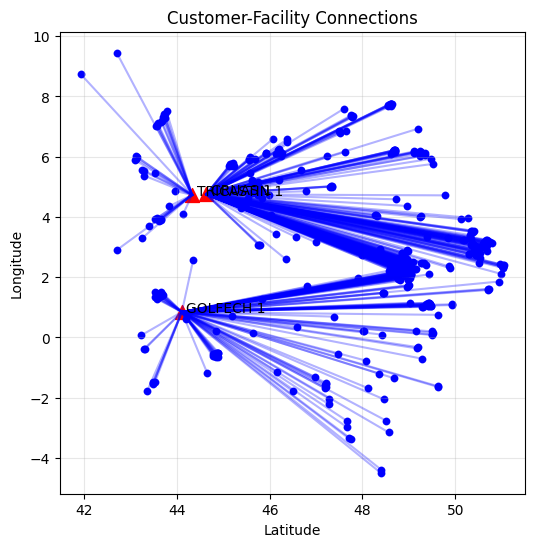

In [5]:
brute_force_solver = BruteForceObnPMed(cities, nuclear_plants, 3)
startTime = time.perf_counter()
brute_force_solution, total_distance = brute_force_solver.solve()
endTime = time.perf_counter()

print(brute_force_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(cities, brute_force_solution)

Found better solution with total distance: 77504.27936623416
Found better solution with total distance: 86230.12032850906
Found better solution with total distance: 100666.71648125243
Found better solution with total distance: 103731.57715339818
Found better solution with total distance: 105067.4917943812
Found better solution with total distance: 105296.42235032856
Found better solution with total distance: 108417.89367534385
Found better solution with total distance: 109901.5205657178
[TRICASTIN 1 44.326355 4.731541, BLAYAIS 1 45.257605 -0.690606, PALUEL 1 49.858754 0.634759, CIVAUX 1 46.46218 0.648879, CHINON B 1 47.228727 0.168307, BUGEY 2 45.801148 5.266072, DAMPIERRE 1 47.732638 2.517824, NOGENT 1 48.514581 3.524182, ST-LAURENT B 1 47.720248 1.580217] 109901.5205657178
Elapsed time: 33.23511829999916


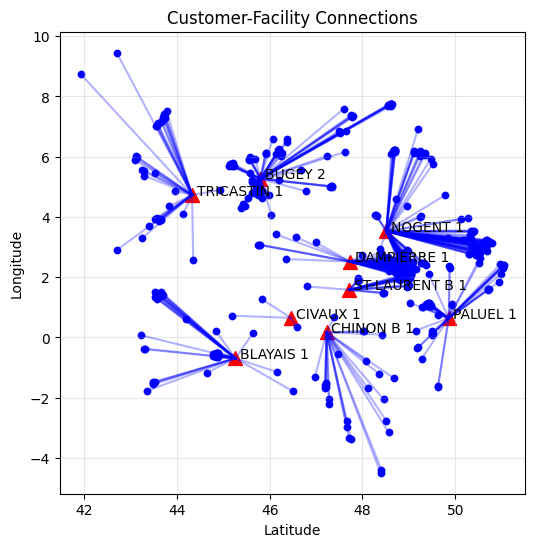

In [26]:
vns_solver = VNSObnPMed(cities, nuclear_plants, 9, iters = 300)
startTime = time.perf_counter()
vns_solution, total_distance = vns_solver.solve()
endTime = time.perf_counter()

print(vns_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(cities, vns_solution)

Found better solution with total distance: 94424.67080479654
Found better solution with total distance: 106567.2504239508
[GRAVELINES 1 51.012846 2.139287, NOGENT 1 48.514581 3.524182, ST-LAURENT B 1 47.720248 1.580217, CHINON B 1 47.228727 0.168307, CHOOZ B 1 50.090344 4.789588, CRUAS 1 44.63283 4.750824, BLAYAIS 1 45.257605 -0.690606, BELLEVILLE 1 47.508946 2.875676, ST-ALBAN 1 45.405445 4.755573] 106567.2504239508
Elapsed time: 4.1748677999985375


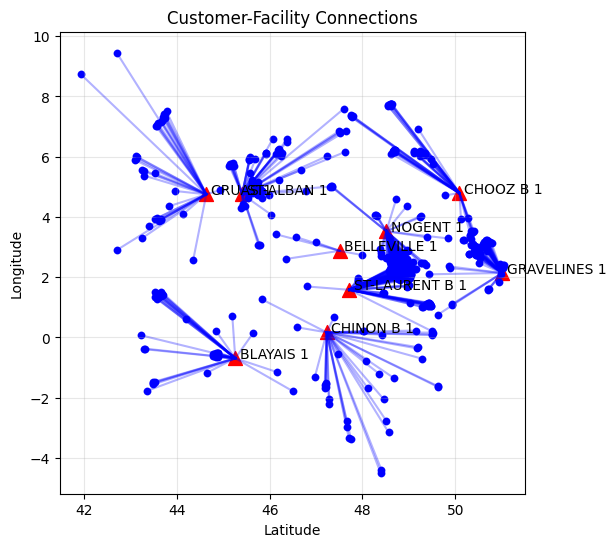

In [39]:
sa_solver = SAObnPMed(cities, nuclear_plants, 9, iters = 300)
startTime = time.perf_counter()
sa_solution, total_distance = sa_solver.solve()
endTime = time.perf_counter()

print(sa_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(cities, sa_solution)

Found better solution with total distance: 85301.70319075507
Found better solution with total distance: 93715.1468653162
Found better solution with total distance: 100898.16255144207
Found better solution with total distance: 101152.7567827467
Found better solution with total distance: 106567.2504239508
[BUGEY 2 45.801148 5.266072, PENLY 1 49.976144 1.210236, CRUAS 1 44.63283 4.750824, CIVAUX 1 46.46218 0.648879, ST-LAURENT B 1 47.720248 1.580217, BELLEVILLE 1 47.508946 2.875676, NOGENT 1 48.514581 3.524182, PALUEL 1 49.858754 0.634759, FLAMANVILLE 1 49.535986 -1.883342] 106567.2504239508
Elapsed time: 6.975443899998936


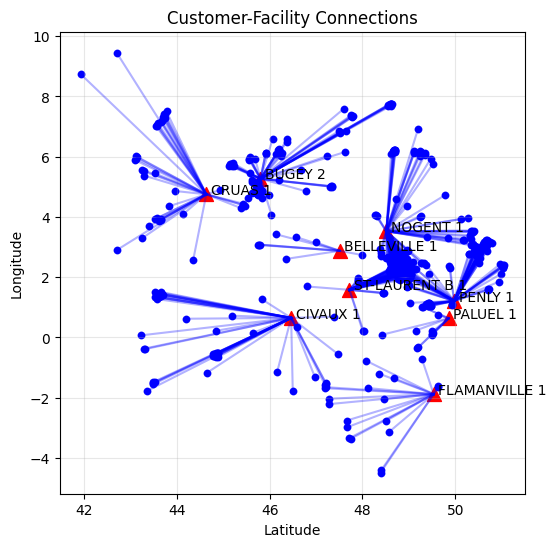

In [34]:
ts_solver = TSObnPMed(cities, nuclear_plants, 9, iters = 500)
startTime = time.perf_counter()
ts_solution, total_distance = ts_solver.solve()
endTime = time.perf_counter()

print(ts_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(cities, ts_solution)

In [9]:
print(calculate_bounds(cities))

((41.9267, 51.04129999999999), (-4.49, 9.4503))


30, 100: Current best solution: 100727.10455151465
60, 100: Current best solution: 138390.2112181498
90, 100: Current best solution: 226954.2543041615
[f 43.89917087761615 3.7303466665162297, f 41.9267 -0.30732882168387354, f 42.731176461655494 -3.8240259511734207, f 43.81219587226006 3.89861210572135, f 49.48250033006955 -4.49, f 45.07565538898239 1.996209575036327, f 41.98859953813482 5.759322042751071, f 42.77089933144771 6.05891136828767, f 41.945350647817946 -2.893671555544254] 236291.36722206842
Elapsed time: 12.3131484000005


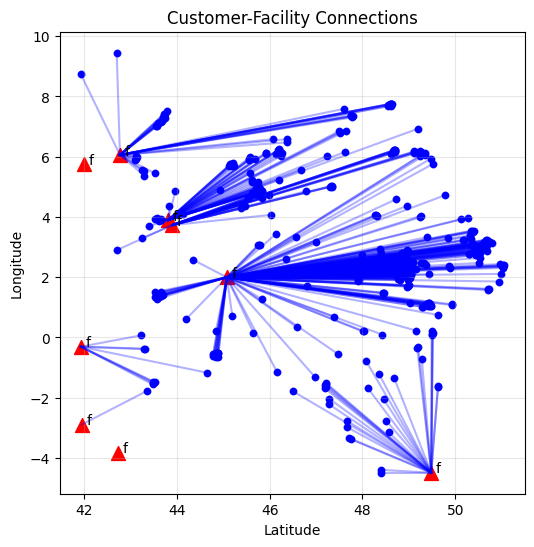

In [41]:
apf_solver = APFObnPMed(cities, 9, calculate_bounds(cities))
startTime = time.perf_counter()
apf_solution, total_distance = apf_solver.solve()
endTime = time.perf_counter()

print(apf_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(cities, apf_solution)

30, 100: Current best solution: 86611.20664449477
60, 100: Current best solution: 112318.5384481053
90, 100: Current best solution: 141223.90412571758
Elapsed time: 15.18712400000004
[f 45.23686077758251 -4.053349745782496, f 44.242190573877444 10.785710824947996, f 48.16474177064363 10.413259203263092, f 44.09891169854448 11.0413921902808, f 41.55561003259249 -1.7290400408541604, f 49.97855380744331 9.600726213655706, f 41.84659643994999 -3.1008319372763906, f 45.62015609337061 -4.066472988216417, f 49.860200160458255 9.783667575553316] 292953.059468647


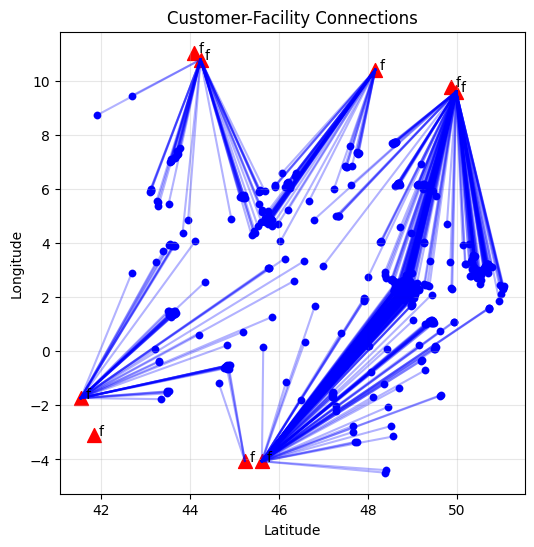

In [42]:
apfconstraint_solution = APFObnPMedWithConstraint(cities, 9, calculate_bounds(cities), 200)
startTime = time.perf_counter()
best_locations, total_distance = apfconstraint_solution.solve()
endTime = time.perf_counter()
print(f"Elapsed time: {endTime - startTime}")

print(best_locations, total_distance)
plot(cities, best_locations)

Found better solution with total distance: 82825.63717087804
Found better solution with total distance: 88588.15280457541
Found better solution with total distance: 91163.0858569793
Found better solution with total distance: 92712.37394676034
Found better solution with total distance: 95806.54418159377
Found better solution with total distance: 98383.11095631334
Found better solution with total distance: 98748.04408127588
Found better solution with total distance: 100974.43296294875
Found better solution with total distance: 101816.0677390779
Found better solution with total distance: 103910.7330071159
Found better solution with total distance: 103967.32160946881
Found better solution with total distance: 108736.24728172312
Found better solution with total distance: 110962.63616339599
Found better solution with total distance: 111856.69392758196
Found better solution with total distance: 120180.1022201535
Found better solution with total distance: 122406.49110182637
Found better soluti

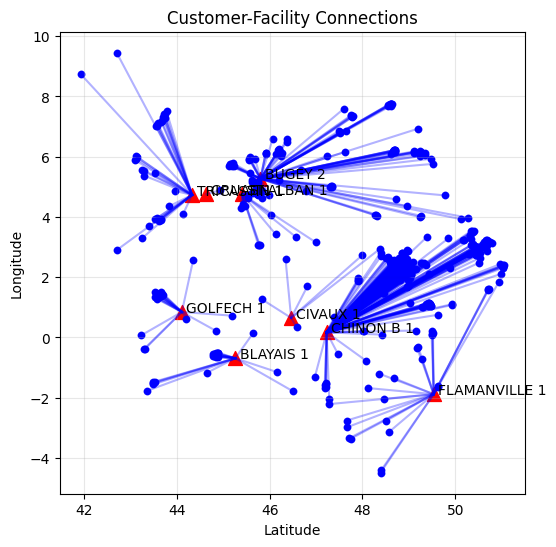

In [12]:
brute_force_solver = BruteForceObnPMed(cities, nuclear_plants, 9)
startTime = time.perf_counter()
brute_force_solution, total_distance = brute_force_solver.solve()
endTime = time.perf_counter()

print(brute_force_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(cities, brute_force_solution)

Found better solution with total distance: 83254.76214463465
Found better solution with total distance: 87171.20491045868
Found better solution with total distance: 97770.6679891798
Found better solution with total distance: 103460.42377711457
Found better solution with total distance: 103910.7330071159
Found better solution with total distance: 105585.26139561868
Found better solution with total distance: 111433.39686784256
[PENLY 1 49.976144 1.210236, FLAMANVILLE 1 49.535986 -1.883342, ST-LAURENT B 1 47.720248 1.580217, DAMPIERRE 1 47.732638 2.517824, BELLEVILLE 1 47.508946 2.875676, CHOOZ B 1 50.090344 4.789588, BUGEY 2 45.801148 5.266072, GOLFECH 1 44.105751 0.84572, PALUEL 1 49.858754 0.634759] 111433.39686784256
Elapsed time: 23.682133899999826


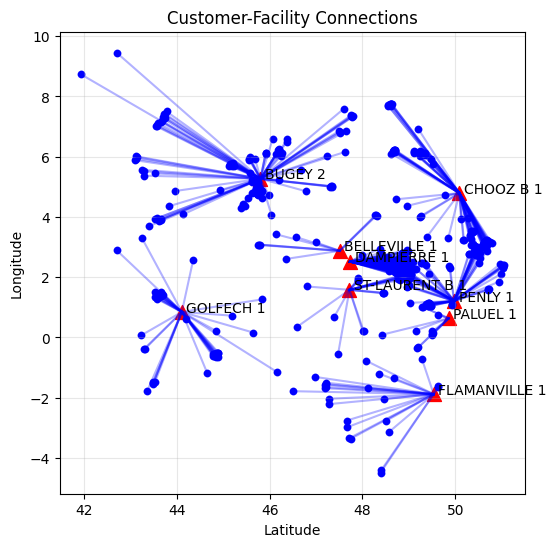

In [36]:
vns_solver = VNSObnPMed(cities, nuclear_plants, 9, iters = 200)
startTime = time.perf_counter()
vns_solution, total_distance = vns_solver.solve()
endTime = time.perf_counter()

print(vns_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(cities, vns_solution)

Found better solution with total distance: 90698.27260700341
Found better solution with total distance: 90890.7528707766
Found better solution with total distance: 93324.38493241715
Found better solution with total distance: 103529.92353042458
Found better solution with total distance: 104601.77587562715
[FLAMANVILLE 1 49.535986 -1.883342, GOLFECH 1 44.105751 0.84572, TRICASTIN 1 44.326355 4.731541, CATTENOM 1 49.415953 6.218271, ST-LAURENT B 1 47.720248 1.580217, NOGENT 1 48.514581 3.524182, DAMPIERRE 1 47.732638 2.517824, PENLY 1 49.976144 1.210236, BUGEY 2 45.801148 5.266072] 104601.77587562715
Elapsed time: 4.259849799999984


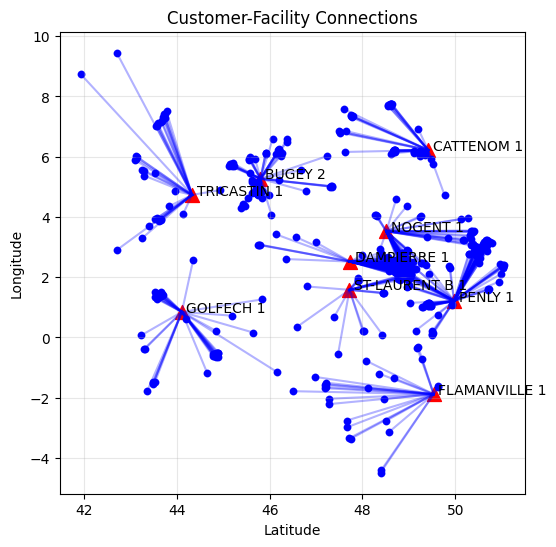

In [14]:
sa_solver = SAObnPMed(cities, nuclear_plants, 9, iters = 300)
startTime = time.perf_counter()
sa_solution, total_distance = sa_solver.solve()
endTime = time.perf_counter()

print(sa_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(cities, sa_solution)

Found better solution with total distance: 83344.60832795808
Found better solution with total distance: 92256.87555501563
Found better solution with total distance: 105020.46494834776
Found better solution with total distance: 107070.75578347898
Found better solution with total distance: 107081.32946592088
[CATTENOM 1 49.415953 6.218271, TRICASTIN 1 44.326355 4.731541, NOGENT 1 48.514581 3.524182, CIVAUX 1 46.46218 0.648879, GOLFECH 1 44.105751 0.84572, GRAVELINES 1 51.012846 2.139287, ST-LAURENT B 1 47.720248 1.580217, FLAMANVILLE 1 49.535986 -1.883342, ST-ALBAN 1 45.405445 4.755573] 107081.32946592088
Elapsed time: 4.200668699999369


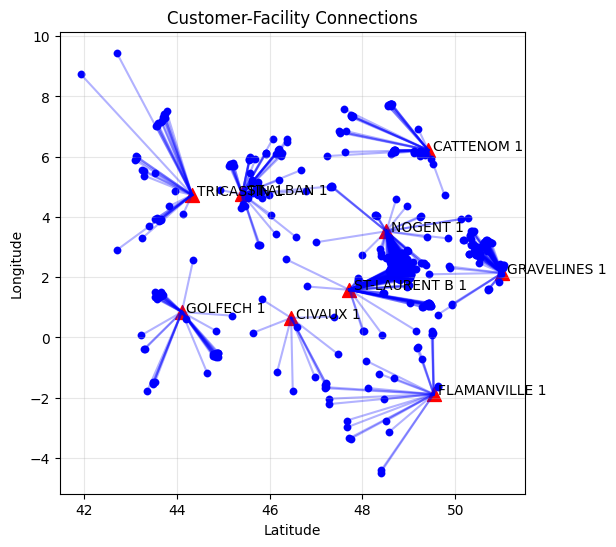

In [37]:
ts_solver = TSObnPMed(cities, nuclear_plants, 9, iters = 300)
startTime = time.perf_counter()
ts_solution, total_distance = ts_solver.solve()
endTime = time.perf_counter()

print(ts_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(cities, ts_solution)

30, 200: Current best solution: 119940.37024895506
60, 200: Current best solution: 132894.02452670582
90, 200: Current best solution: 132894.02452670582
120, 200: Current best solution: 132894.02452670582
150, 200: Current best solution: 132894.02452670582
180, 200: Current best solution: 132894.02452670582
[f 46.43635172509847 2.8163748100772397, f 51.04129999999999 2.5603670329058628, f 51.04129999999999 -0.30548524538523364, f 44.81534119233406 9.4503, f 41.9267 2.72253402304519, f 51.04129999999999 -0.4476831668365744, f 45.616178393805946 -4.432461436933945, f 43.601530475781296 -2.0985675982845517, f 49.636571174337924 -2.9052870694258397] 132894.02452670582
Elapsed time: 25.273775400000886


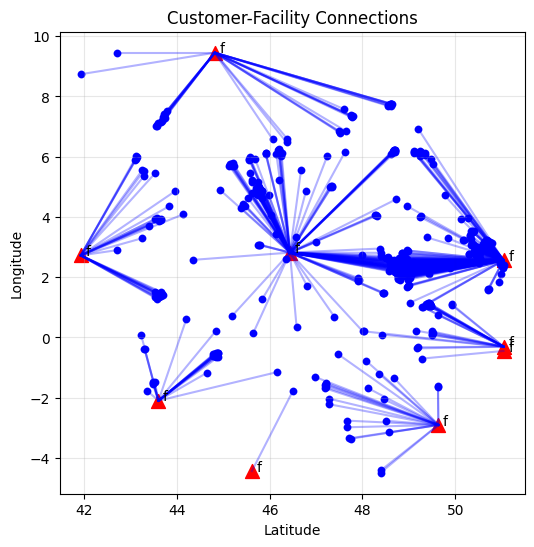

In [43]:
apf_solver = APFObnPMed(cities, 9, calculate_bounds(cities), iters = 200)
startTime = time.perf_counter()
apf_solution, total_distance = apf_solver.solve()
endTime = time.perf_counter()

print(apf_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(cities, apf_solution)

30, 200: Current best solution: 134033.24936530401
60, 200: Current best solution: 165901.10083061416
90, 200: Current best solution: 192057.47817586662
120, 200: Current best solution: 212151.70212417014
150, 200: Current best solution: 236104.78299224415
180, 200: Current best solution: 249225.11948413763
Elapsed time: 25.5950239
[f 45.71312407051188 -4.464551997218639, f 46.28885100025566 -4.9991237536050654, f 50.11908386163968 9.4503, f 51.04129999999999 -3.4807247956349903, f 46.10013665298672 9.4503, f 45.57202921609632 9.356934985122818, f 41.63518262935315 -2.5469139619557266, f 49.88853460665634 9.733303201427368, f 50.925217480776716 9.4503] 257743.8674597577


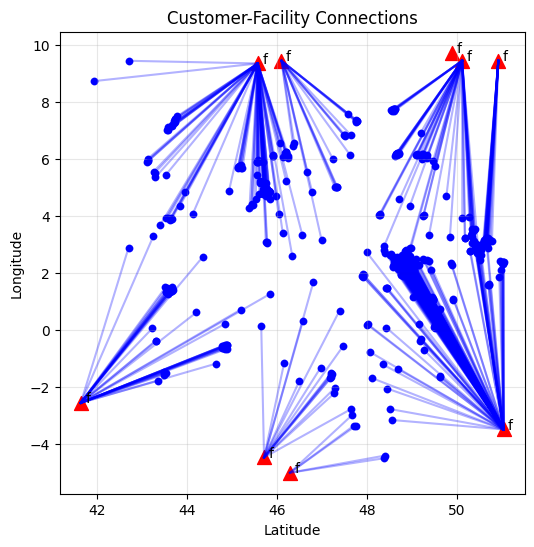

In [17]:
apfconstraint_solution = APFObnPMedWithConstraint(cities, 9, calculate_bounds(cities), 200, iters = 200)
startTime = time.perf_counter()
best_locations, total_distance = apfconstraint_solution.solve()
endTime = time.perf_counter()
print(f"Elapsed time: {endTime - startTime}")

print(best_locations, total_distance)
plot(cities, best_locations)